In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use(['dark_background', 'science', 'notebook'])

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [67]:
# generate data
def function(x):
    # return -1 + 5*x - 25*x**2 + 2*x**3
    return 6 -8*x + 3*x**2 + 2*x**3

df = pd.DataFrame()
n_samples = 10
xmin, xmax = -2.5, 2
np.random.seed(421)
df['x'] = np.random.uniform(low=xmin, high=xmax, size=(n_samples,))
df['y'] = function(df['x']) + np.random.uniform(-1,1, size=(n_samples,))
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

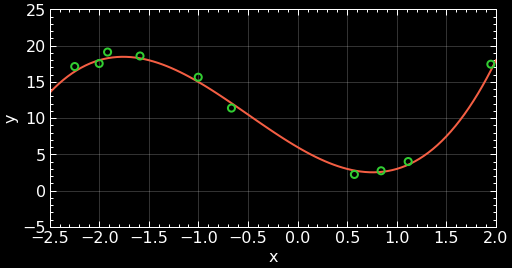

In [68]:
fig, ax = plt.subplots(figsize=(8, 4))
ymin, ymax = -5, 25
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=2, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_znorm = scaler.fit_transform(Y)

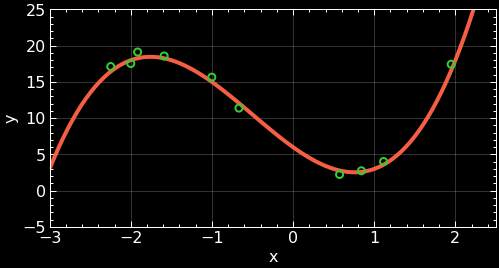

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = -3, 2.5
ymin, ymax = -5, 25
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
# ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
# ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [79]:
kernel = ConstantKernel(10, (1e-3, 1e5)) * RBF(length_scale=1, length_scale_bounds=(1e-3, 1e5))
# kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, Y)
x_axis = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yhat, sigma = model.predict(x_axis, return_std=True)

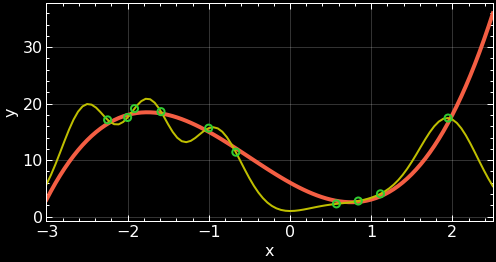

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.plot(x_axis, yhat, c='y', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [81]:
np.random.seed(1)
def f(x):
    """The function to predict."""
    # return 5+np.sin(x)*np.exp(-x/5)
    return function(x)

#  First the noiseless case
# X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
X = np.atleast_2d([1., 3., 12]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 15, 1000)).T

# Instantiate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e5)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


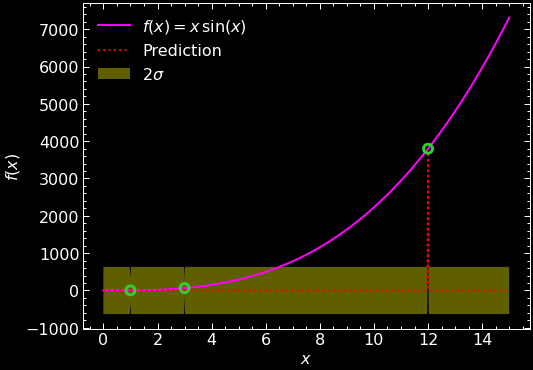

In [82]:
plt.figure()
plt.plot(x, f(x), 'magenta', label=u'$f(x) = x\,\sin(x)$')
plt.scatter(X, y, s=80, ec='limegreen', fc='none', lw=3, zorder=5)
# plt.plot(X, y, 'ro', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'r:', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 2 * sigma,
                        (y_pred + 2 * sigma)[::-1]]),
         alpha=.5, fc='y', ec='None', label=r'$2\sigma$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$');
# plt.xlim(-10, 20)
plt.legend(loc='best');

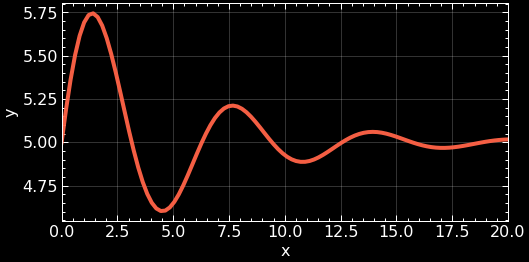

In [229]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = 0, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, f(x), c='tomato', lw=4, alpha=0.96, )
# ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [192]:
f(4)

19.586138678785847

# PyMC

In [29]:
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [35]:
df

,x,y
0,2.490802,-208.625145
1,14.014286,757.865645
2,9.639879,-417.878546
3,6.973170,-561.151633
4,-1.879627,-175.639542
5,-1.880110,-175.381616
6,-3.838328,-540.760512
7,12.323523,11.966028
8,7.022300,-519.739832
9,9.161452,-557.370310


In [48]:
with pm.Model() as model1:
    β0, β1, β2, β3 = [pm.Normal('β'+str(i), mu=0, sigma=50) for i in range(4)]
    σ = pm.HalfNormal('σ', sigma=50)
    x, y = df['x'], df['y']
    μ = β0 + β1 * x + β2 * x**2 + β3 * x**3
    y1 = pm.Normal("y1", mu=μ, sd=σ, observed=y)
    trace = pm.sample(1000, tune=1000, target_accept=0.95, chains=4)

C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [σ, β3, β2, β1, β0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 113 seconds.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


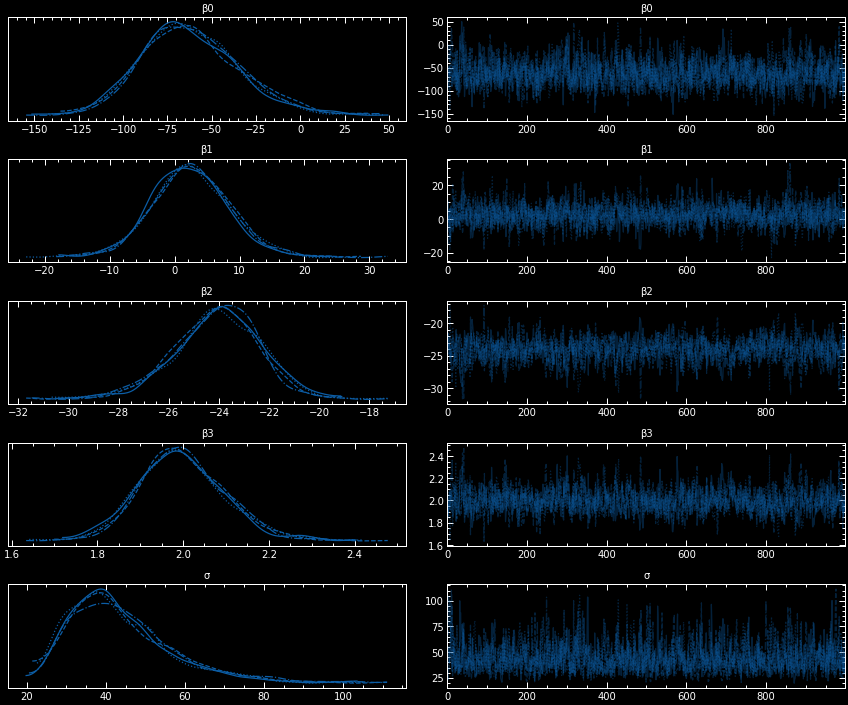

In [49]:
az.plot_trace(trace);
plt.tight_layout();

In [50]:
az.summary(trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β0,-61.99,28.09,-111.48,-6.42,0.85,0.60,1108.49,1447.28,1.0
β1,2.49,6.12,-8.78,14.31,0.18,0.13,1187.55,1605.00,1.0
β2,-24.08,1.75,-27.37,-20.82,0.06,0.04,863.26,1303.93,1.0
β3,2.00,0.10,1.81,2.19,0.00,0.00,960.90,1300.34,1.0
σ,43.82,13.35,22.35,68.70,0.38,0.27,1263.32,1635.12,1.0


In [ ]:
# -1 + 5*x - 25*x**2 + 2*x**3